<a href="https://colab.research.google.com/github/K-Kamonrat/DPDM/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generate Data

In [4]:
from sklearn.datasets import make_blobs  #ใช้ generate data เอง

In [5]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=6)

In [6]:
X.shape

(300, 2)

In [11]:
from matplotlib import  pyplot as plt

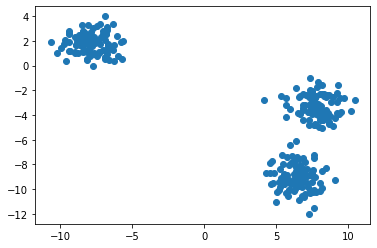

In [12]:
plt.scatter(X[:,0],X[:,1])

##Import

In [14]:
from sklearn.cluster import  KMeans

##Define

In [20]:
KMclust = KMeans(n_clusters=3)

##Train

In [21]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##Predict

In [22]:
label = KMclust.predict(X)

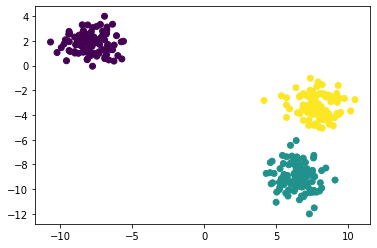

In [23]:
plt.scatter(X[:,0],X[:,1], c=label)

#Color quantization (application of kmean)

In [24]:
from google.colab import  drive

In [25]:
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import os

In [41]:
import cv2
path =  '/content/drive/My Drive/DWDM_material'

In [42]:
img = cv2.imread(os.path.join(path, 'baboon.jpg'))

In [45]:
img.shape #(row,colum,rgb color space)

(446, 320, 3)

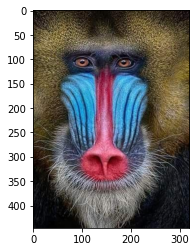

In [47]:
RGB_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [43]:
img

array([[[22, 27, 30],
        [10, 15, 18],
        [10, 15, 18],
        ...,
        [ 0,  0,  6],
        [ 4,  3, 12],
        [25, 24, 33]],

       [[15, 20, 23],
        [ 5, 10, 13],
        [ 6, 11, 14],
        ...,
        [ 6,  5, 14],
        [ 9,  8, 17],
        [ 4,  3, 12]],

       [[11, 16, 19],
        [ 2,  7, 10],
        [ 1,  6,  9],
        ...,
        [13, 12, 21],
        [16, 15, 24],
        [ 7,  6, 15]],

       ...,

       [[14, 10,  9],
        [12,  8,  7],
        [17, 13, 12],
        ...,
        [16, 11, 10],
        [ 9,  4,  3],
        [ 8,  3,  2]],

       [[14, 10,  9],
        [13,  9,  8],
        [18, 14, 13],
        ...,
        [15, 10,  9],
        [ 7,  2,  1],
        [ 7,  2,  1]],

       [[14, 10,  9],
        [13,  9,  8],
        [18, 14, 13],
        ...,
        [15, 10,  9],
        [ 7,  2,  1],
        [ 6,  1,  0]]], dtype=uint8)

#Count uniqe colors

In [48]:
import numpy as np

In [49]:
np.unique(RGB_img).shape

(256,)

#Use K-mean

##define

In [63]:
myQuantize = KMeans(n_clusters=7)

In [64]:
img_row = np.reshape(RGB_img,(446*320,3))
img_row

array([[30, 27, 22],
       [18, 15, 10],
       [18, 15, 10],
       ...,
       [ 9, 10, 15],
       [ 1,  2,  7],
       [ 0,  1,  6]], dtype=uint8)

##train


In [65]:
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##predict

In [66]:
res = myQuantize.predict(img_row)
res

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

#Get cluster centers

In [67]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[ 98.66505003,  89.22753943,  72.83737494],
       [ 20.83814709,  18.24834671,  16.94103534],
       [131.93746136, 123.4592191 , 111.78917582],
       [ 61.28192318,  53.69536725,  45.0337075 ],
       [184.14982894, 155.21724693, 162.43026766],
       [ 70.08339418, 153.14245153, 201.61499148],
       [174.73078087,  60.57460654,  88.19143462]])

In [68]:
Clus_cen.shape #RGB เป็นจำนวนเต็ม แต่ centroid เป็นmLobp,ที่ได้มาจาก mean

(7, 3)

#Map color back to the image

In [69]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [70]:
new_img_ = new_img/255 #แก้ปัญหาที่เป็นทศนิยม เพราะเลขสีที่เอาไปแทนใน RGB เป็นได้2แบบ คือ 1)จำนวนเต็ม 0-255 2)จำนวนทศนิยม 0-1 เราเลือกทางที่2เลยเอาค่าที่ควรจะเป็นหารด้วย 255

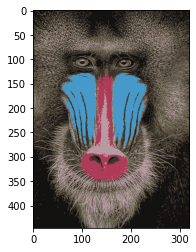

In [71]:
plt.imshow(new_img_)